In [1]:
import numpy as np
from dataset import BooleanDataset
import matplotlib.pyplot as plt

In [2]:
def plot_decision_boundary(X, y, w1, w0, w2, task = "OR"):
    colors = ["#FF0000" if y[i]==-1 else "#0000FF" for i in range(len(y))]
    if task != "NOT":
        x = [i[1] for i in X]
        y = [i[2] for i in X]
        w0, w1, w2 = w0, w1, w2
        slope = -w1/w2
        intercept = -w0/w2
        for i in np.linspace(min(x), max(x)):
            y1 = (slope*i) + intercept
            plt.plot(i, y1, 'ko')

        plt.scatter(x = x, y = y, c = colors)
        plt.show()
    else:
        x = [i[1] for i in X]
        y = [i[2] for i in X]
        w0, w1, w2 = w0, w1, w2
        intercept = -w0/w1
        for i in np.linspace(-min(x), max(x)):
            plt.plot(intercept, i, 'ko')

        plt.scatter(x = x, y = y, c = colors)
        plt.show()

In [3]:
class PTA():
    def __init__(self, epochs, task = "OR"):
        self.task = task
        self.seen_params = []
        self.epochs = epochs

    def _init_params(self):
        self.bias = 1
        self.w1 = 0
        self.w2 = 0
        self.w0 = self.bias

    def _update_params(self, X, y, y_preds):
        for i in range(len(y)):
            if y[i] != y_preds[i]:
                error = y[i] - y_preds[i]
                self.w0 += error * X[i][0]
                self.w1 += error * X[i][1]
                self.w2 += error * X[i][2]

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        n = X.shape[0]
        self._init_params()
        converged = False
        i = 1
        while i<self.epochs and not converged:
            y_preds = self.predict(X)
            converged = (n == (y_preds==y).sum())
            self._update_params(X, y, y_preds)
            w1 = self.w1

            if converged:
                print("Convergence reached. Hyperplane distributing the two classes has been found.")
                break

            w2 = self.w2
            w0 = self.w0
            y_preds = self.predict(X)
            print("Iteration ", i, " -> w0: ", w0, "| w1: ", w1, "| w2: ", w2, " | Accuracy: ", 100*(y_preds==y).sum()/n)
            plot_decision_boundary(X, y, w1, w0, w2, self.task)

            if self.task != "NOT":
                self.seen_params.append([w0, w1, w2])
            else:
                self.seen_params.append([w1])
            i+=1
        if not converged:
            print(f"Convergence not reached after {self.epochs} epochs. Consider using a larger number of epochs or a linearly separable dataset.")

    def predict(self, X):
        w = np.array([self.w0, self.w1, self.w2])
        y_preds = []
        for each in X:
            activation = np.sum(np.matmul(w.T, each))
            if activation>=0:
                y_preds.append(1)
            else:
                y_preds.append(-1)
        y_preds = np.array(y_preds)

        return y_preds
    
    def get_params(self):
        return self.seen_params[-1]

In [4]:
def save_model(model, filename):
    import pickle
    with open(f"Model_Saves/{filename}", 'wb') as f:
        pickle.dump(model, f)

def load_model(filename):
    import pickle
    with open(f"Model_Saves/{filename}", 'rb') as f:
        return pickle.load(f)

### AND

In [5]:
and_dataset = BooleanDataset("AND")
and_dataset.generate_data()

In [6]:
X, y = and_dataset.data, and_dataset.labels

In [7]:
X, y

([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], [-1, -1, -1, 1])

In [8]:
and_pta = PTA(epochs=10, task = "AND")

Iteration  1  -> w0:  -5 | w1:  -2 | w2:  -2  | Accuracy:  75.0


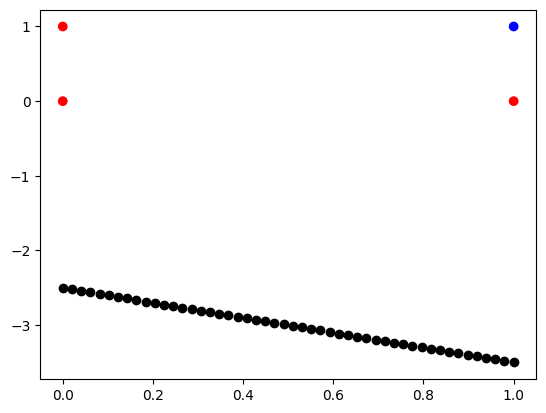

Iteration  2  -> w0:  -3 | w1:  0 | w2:  0  | Accuracy:  75.0


C:\Users\gener\AppData\Local\Temp\ipykernel_4616\2421087368.py:7: RuntimeWarning: invalid value encountered in long_scalars
  slope = -w1/w2
C:\Users\gener\AppData\Local\Temp\ipykernel_4616\2421087368.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  intercept = -w0/w2


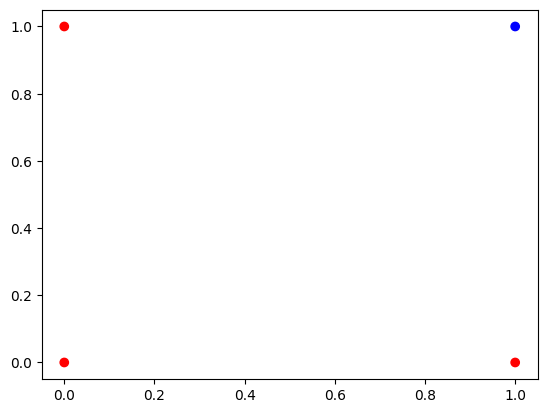

Iteration  3  -> w0:  -1 | w1:  2 | w2:  2  | Accuracy:  50.0


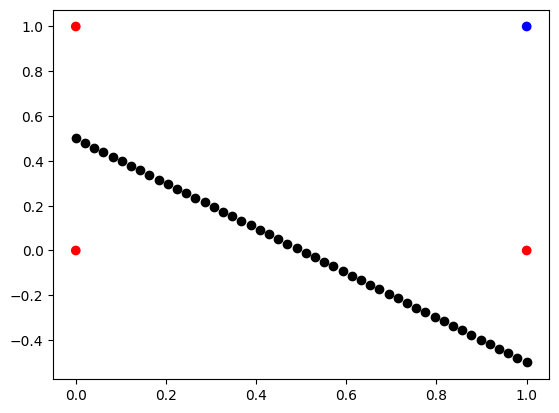

Iteration  4  -> w0:  -5 | w1:  0 | w2:  0  | Accuracy:  75.0


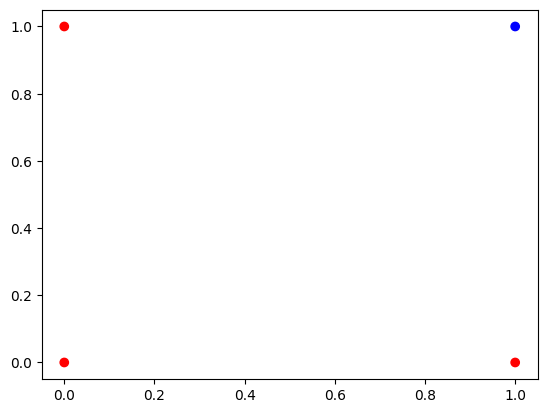

Iteration  5  -> w0:  -3 | w1:  2 | w2:  2  | Accuracy:  100.0


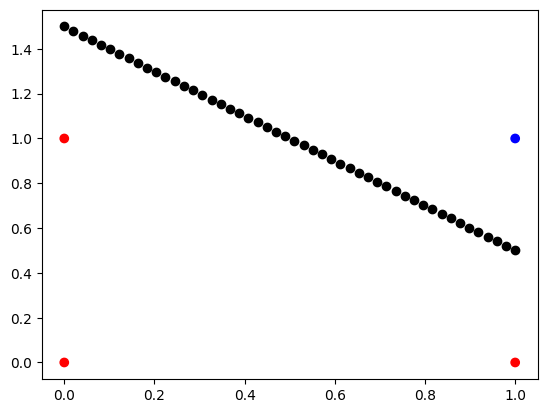

Convergence reached. Hyperplane distributing the two classes has been found.


In [9]:
and_pta.fit(X, y)

In [10]:
save_model(and_pta, "and_pta.pickle")

### OR

In [11]:
or_dataset = BooleanDataset("OR")
or_dataset.generate_data()

In [12]:
X, y = or_dataset.data, or_dataset.labels

In [13]:
X, y

([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], [-1, 1, 1, 1])

In [14]:
or_pta = PTA(epochs=10, task = "OR")

Iteration  1  -> w0:  -1 | w1:  0 | w2:  0  | Accuracy:  25.0


C:\Users\gener\AppData\Local\Temp\ipykernel_4616\2421087368.py:7: RuntimeWarning: invalid value encountered in long_scalars
  slope = -w1/w2
C:\Users\gener\AppData\Local\Temp\ipykernel_4616\2421087368.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  intercept = -w0/w2


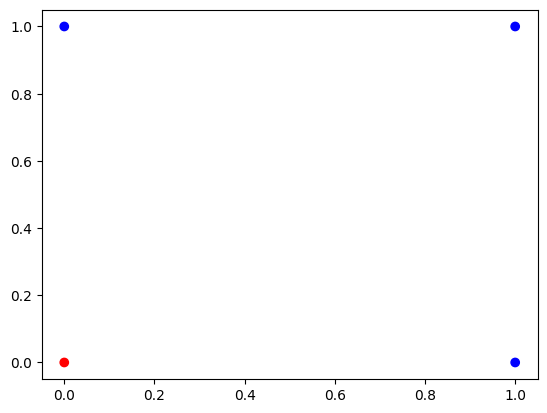

Iteration  2  -> w0:  5 | w1:  4 | w2:  4  | Accuracy:  75.0


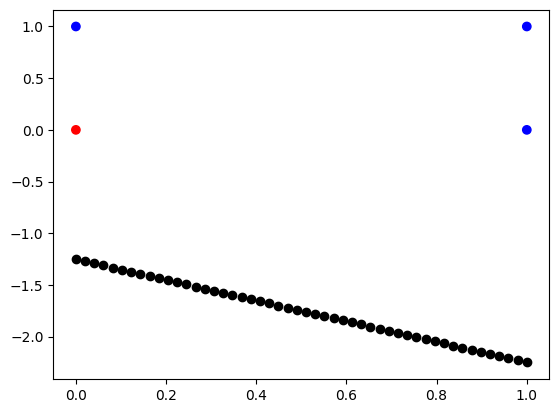

Iteration  3  -> w0:  3 | w1:  4 | w2:  4  | Accuracy:  75.0


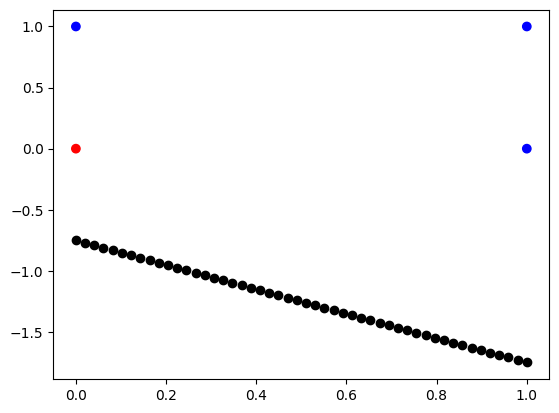

Iteration  4  -> w0:  1 | w1:  4 | w2:  4  | Accuracy:  75.0


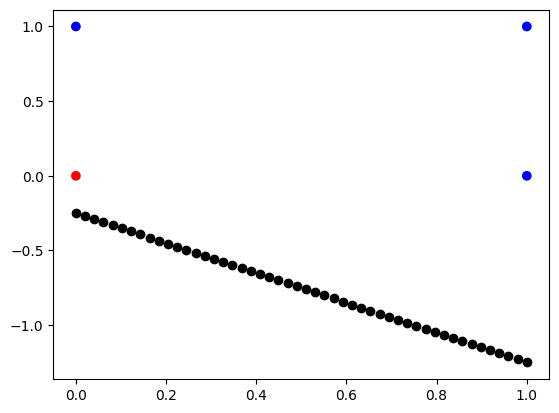

Iteration  5  -> w0:  -1 | w1:  4 | w2:  4  | Accuracy:  100.0


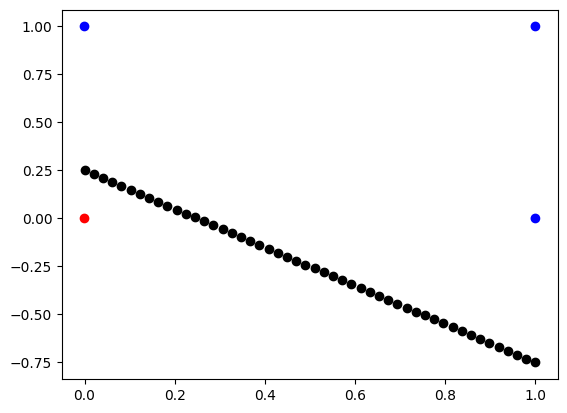

Convergence reached. Hyperplane distributing the two classes has been found.


In [15]:
or_pta.fit(X, y)

In [16]:
save_model(or_pta, "or_pta.pickle")

### NOT

In [17]:
not_dataset = BooleanDataset("NOT")
not_dataset.generate_data()

In [18]:
X, y = not_dataset.data, not_dataset.labels

In [19]:
X, y

([[1, 0, 0], [1, 1, 0]], [True, -1])

In [20]:
not_pta = PTA(epochs=10, task="NOT")

Iteration  1  -> w0:  -1 | w1:  -2 | w2:  0  | Accuracy:  50.0


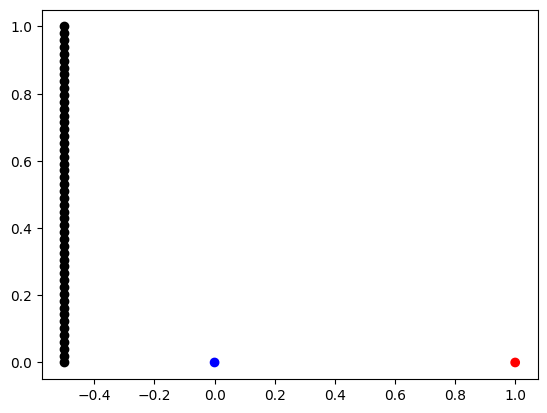

Iteration  2  -> w0:  1 | w1:  -2 | w2:  0  | Accuracy:  100.0


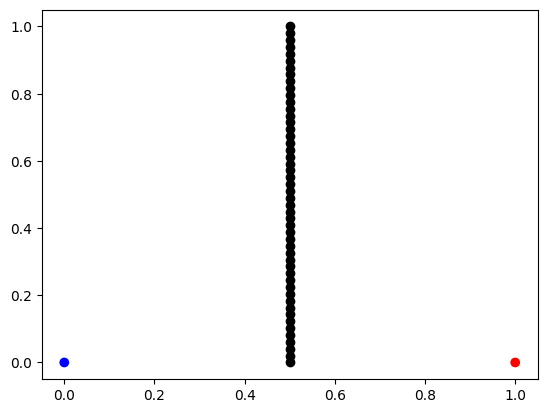

Convergence reached. Hyperplane distributing the two classes has been found.


In [21]:
not_pta.fit(X, y)

In [22]:
save_model(not_pta, "not_pta.pickle")

### XOR

In [23]:
xor_dataset = BooleanDataset("XOR")
xor_dataset.generate_data()

In [24]:
X, y = xor_dataset.data, xor_dataset.labels

In [25]:
X, y

([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], [-1, 1, 1, -1])

In [27]:
xor_pta = PTA(epochs=10, task = "XOR")

Iteration  1  -> w0:  -3 | w1:  -2 | w2:  -2  | Accuracy:  50.0


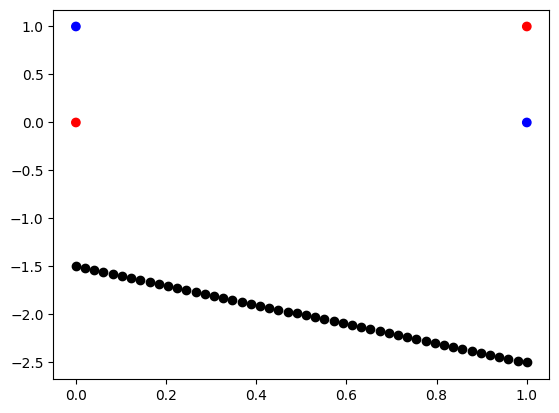

Iteration  2  -> w0:  1 | w1:  0 | w2:  0  | Accuracy:  50.0


C:\Users\gener\AppData\Local\Temp\ipykernel_4616\2421087368.py:7: RuntimeWarning: invalid value encountered in long_scalars
  slope = -w1/w2
C:\Users\gener\AppData\Local\Temp\ipykernel_4616\2421087368.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  intercept = -w0/w2


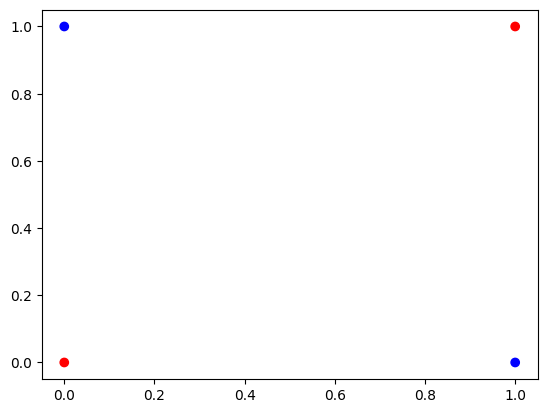

Iteration  3  -> w0:  -3 | w1:  -2 | w2:  -2  | Accuracy:  50.0


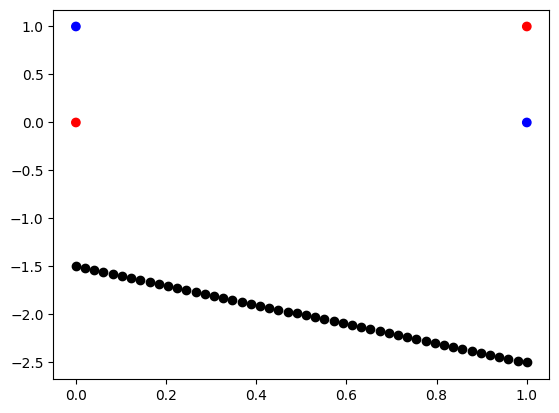

Iteration  4  -> w0:  1 | w1:  0 | w2:  0  | Accuracy:  50.0


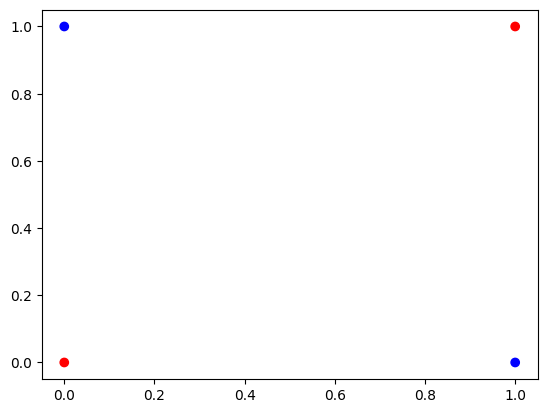

Iteration  5  -> w0:  -3 | w1:  -2 | w2:  -2  | Accuracy:  50.0


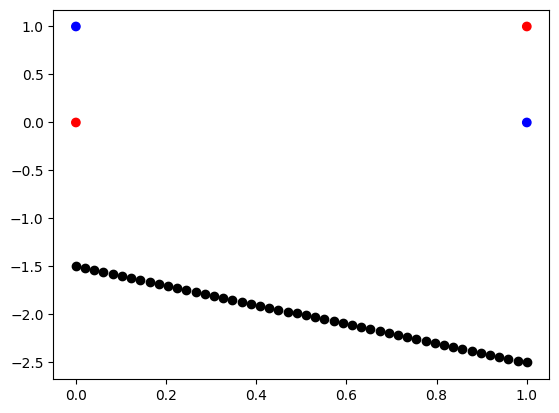

Iteration  6  -> w0:  1 | w1:  0 | w2:  0  | Accuracy:  50.0


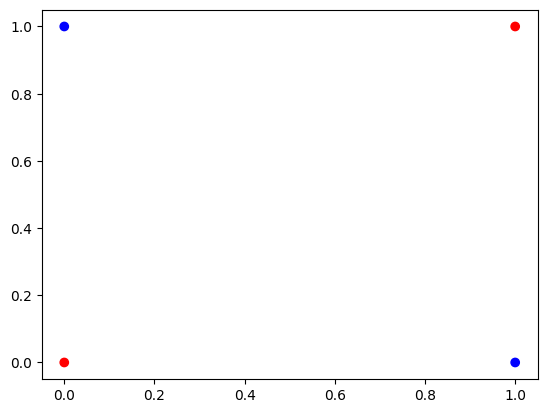

Iteration  7  -> w0:  -3 | w1:  -2 | w2:  -2  | Accuracy:  50.0


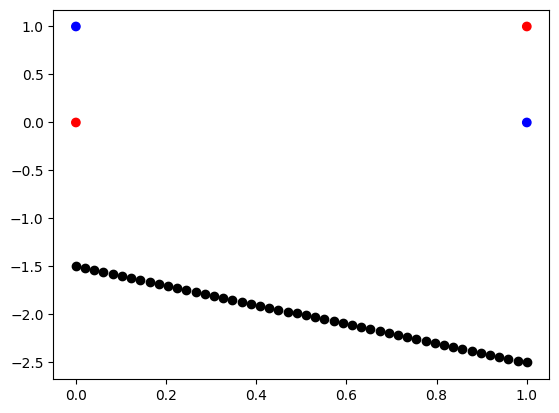

Iteration  8  -> w0:  1 | w1:  0 | w2:  0  | Accuracy:  50.0


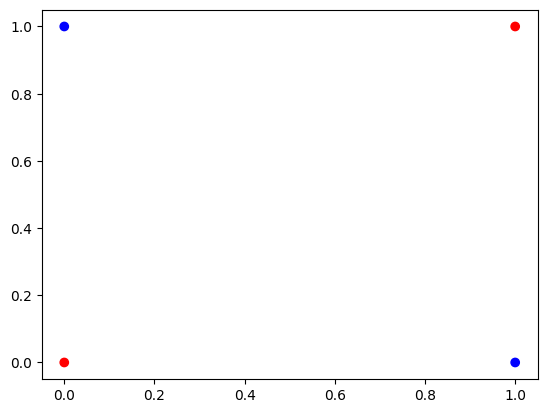

Iteration  9  -> w0:  -3 | w1:  -2 | w2:  -2  | Accuracy:  50.0


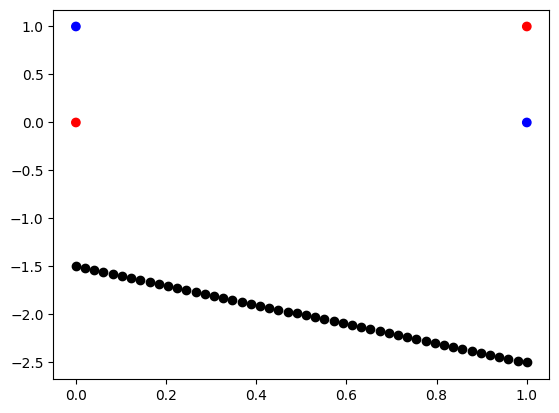

Convergence not reached after 10 epochs. Consider using a larger number of epochs or a linearly separable dataset.


In [28]:
xor_pta.fit(X, y)

In [29]:
save_model(xor_pta, "xor_pta.pickle")